## Exploratory Data Anlysis

### Identifiers
- SUBJECT_ID: identifiers to a unique patient
- HADM_ID: identifiers to an admission to hospital
- ICUSTAY_ID: identifiers to a unique admission to intensive care unit

### Charted events
- OUTPUT events table contains all measurements related to output for a given patient.

### Create the primary outcome variable
- The length of stay is the time from the admission to the discharge from hospital.
- The data contains protected health information so the actual admission time and discharge time are shifted.
- The distribution of the outcome variable is highly skewed.
    - Dichotomize the outcome variable (imbalanced classification problem).
    - Keep the continuous variable and find optimal methods to model skewed distribution.

### Discharge Location
- Most of the patients are discharged to home/home health care/hospice-home/home with home IV provider.
- Some of the patients are discharged to SNF (Skilled Nursing Facility). It can also be a secondary outcome variable.
- Some of the patients are discharged to hospice-medical facility.  

**Note:**  
- Home Health Care: Home health care is a wide range of health care services that can be given in your home for an illness or injury. Home health care is usually less expensive, more convenient, and just as effective as care you get in a hospital or skilled nursing facility (SNF). References: https://www.medicare.gov/what-medicare-covers/whats-home-health-care
- Long term care hospital: Most patients who need to be in intensive care for an extended time are often transferred to a long-term care hospital to continue that care.

### Potential predictors
#### Demographical Data
- Insurance type, Language, ethnicity, marital_status, age, sex

#### Diagnosis
- Diagnosis variable contains too many levels. 
    - Delete some levels with too less patients.
    - Combine some levels, such as diagnosis starting with nausea and subtypes of coronary artery disease.
- After combining the patients table with the admission table, there is no missing data.

#### Vitals

### DRG codes
- The diagnosis-related group codes is a system to classify hospital cases into one of 467 cases.

According to [physionet tutorial](https://physionet.org/content/mimiciii/1.4/), all the observations who are older than 89 years old will be assigned a fake age. Here, I converted all the observations who are older than 89 years old to 89.

________________________________________

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/processed_data1.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('ROW_ID', axis=1)

In [4]:
df

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,...,INTIME,OUTTIME,ICU_LOS,Height,Weight,GENDER,DOB,DOD,Hosp_LOS,age
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,...,2138-07-17T21:20:07,2138-07-17T23:32:21,0.0918,NaN,NaN,M,2138-07-17 00:00:00,NaN,3 days 20:44:00.000000000,0
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,...,2101-10-20T19:10:11,2101-10-26T20:43:09,6.0646,179.07,96.8,M,2025-04-11 00:00:00,2102-06-14T00:00:00,10 days 18:50:00.000000000,76
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,...,2191-03-16T00:29:31,2191-03-17T16:46:31,1.6785,NaN,53.6,F,2143-05-12 00:00:00,NaN,7 days 18:13:00.000000000,48
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,...,2103-02-02T06:04:24,2103-02-02T08:06:00,0.0844,NaN,NaN,M,2103-02-02 00:00:00,NaN,2 days 07:44:00.000000000,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,...,2175-05-30T21:30:54,2175-06-03T13:39:54,3.6729,NaN,NaN,F,2109-06-21 00:00:00,NaN,16 days 08:45:00.000000000,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,...,2181-01-29T05:33:34,2181-02-09T12:45:20,11.2998,NaN,NaN,M,2127-04-08 00:00:00,NaN,16 days 14:18:00.000000000,54
46516,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,ENGL,...,2184-12-28T17:30:58,2184-12-31T20:56:20,3.1426,NaN,100.5,M,2137-04-07 00:00:00,NaN,12 days 03:45:00.000000000,47
46517,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,ENGL,...,2144-07-25T18:04:42,2144-07-27T17:27:55,1.9745,NaN,65.4,F,2078-10-17 00:00:00,NaN,2 days 23:53:00.000000000,66
46518,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,...,2147-02-08T13:53:58,2147-02-10T17:46:30,2.1615,159.00,68.0,F,2058-05-29 00:00:00,2147-09-29T00:00:00,3 days 05:15:00.000000000,89


some checkings:

In [5]:
np.sum(df['SUBJECT_ID'].value_counts() != 1) # all unique

0

In [6]:
type(df.Hosp_LOS[0])

str

In [7]:
len(df['DIAGNOSIS'].value_counts())

12607

In [8]:
df['HeartRate_Min']

0        140.0
1         75.0
2         74.0
3          NaN
4         76.0
         ...  
46515     74.0
46516     91.0
46517     60.0
46518     49.0
46519     78.0
Name: HeartRate_Min, Length: 46520, dtype: float64

## Further data cleaning and transformation
Dependent Variable: DISCHARGE_LOCATION	

In [9]:
df['DISCHARGE_LOCATION'].unique()

array(['HOME', 'SNF', 'HOME WITH HOME IV PROVIDR', 'HOME HEALTH CARE',
       'DEAD/EXPIRED', 'SHORT TERM HOSPITAL', 'REHAB/DISTINCT PART HOSP',
       'DISC-TRAN CANCER/CHLDRN H', 'LONG TERM CARE HOSPITAL',
       'DISC-TRAN TO FEDERAL HC', 'HOSPICE-MEDICAL FACILITY',
       'LEFT AGAINST MEDICAL ADVI', 'DISCH-TRAN TO PSYCH HOSP',
       'HOSPICE-HOME', 'ICF', 'SNF-MEDICAID ONLY CERTIF',
       'OTHER FACILITY'], dtype=object)

4 types: 

- 1 - dead: 'DEAD/EXPIRED' 
- 2 - snf: 'SNF', 'SNF-MEDICAID ONLY CERTIF'
- 3 - hospital: 'SHORT TERM HOSPITAL', 'REHAB/DISTINCT PART HOSP', 'LONG TERM CARE HOSPITAL', 'DISCH-TRAN TO PSYCH HOSP',
- 4 - others: 'HOME', 'HOME WITH HOME IV PROVIDR', 'HOME HEALTH CARE', 'DISC-TRAN CANCER/CHLDRN H', 'DISC-TRAN TO FEDERAL HC', 'HOSPICE-MEDICAL FACILITY', 'LEFT AGAINST MEDICAL ADVI', 'HOSPICE-HOME', 'ICF', 'OTHER FACILITY'



In [10]:
# target variable encoding
result = [] 
for value in df['DISCHARGE_LOCATION']: 
    if value == 'DEAD/EXPIRED': 
        result.append(1) 
    elif value.startswith('SNF'): 
        result.append(2)
    elif value.endswith('HOSP') or value.endswith('HOSPITAL'): 
        result.append(3)
    else: 
        result.append(4) 
        
df['target'] = result

In [11]:
df.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION',
       'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'HeartRate_Min', 'HeartRate_Max',
       'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min',
       'DiasBP_Max', 'DiasBP_Mean', 'TempC_Max', 'RespRate_Max',
       'RespRate_Mean', 'HeartRate_Mean_1', 'HeartRate_Min_1', 'Glucose_Max',
       'Glucose_Min', 'Glucose_Mean', 'icustay_id', 'INTIME', 'OUTTIME',
       'ICU_LOS', 'Height', 'Weight', 'GENDER', 'DOB', 'DOD', 'Hosp_LOS',
       'age', 'target'],
      dtype='object')

In [12]:
# time in emergency department, if not enter, then 0
df['EDREGTIME'] = df['EDREGTIME'].fillna(0)
df['EDOUTTIME'] = df['EDOUTTIME'].fillna(0)
df['EDstay'] = pd.to_datetime(df.EDOUTTIME) - pd.to_datetime(df.EDREGTIME)

In [13]:
df['Hosp_LOS'] = pd.to_timedelta(df.Hosp_LOS).dt.total_seconds()
df['EDstay'] = df.EDstay.dt.total_seconds()

In [14]:
df_new = df.drop(['DISCHARGE_LOCATION', 'SUBJECT_ID', 'HADM_ID', 'icustay_id', 
                  'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME', 
                  'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 
                  'HeartRate_Min', 'HeartRate_Max', 'SysBP_Min', 'SysBP_Max', 
                  'DiasBP_Min', 'DiasBP_Max', 'RespRate_Max', 'HeartRate_Mean_1',
                  'HeartRate_Min_1', 'Glucose_Max', 'Glucose_Min', 'INTIME', 'OUTTIME', 
                  'DOB', 'DOD', 'LANGUAGE', 'MARITAL_STATUS', 'Height'], axis=1)

Useful Variables: 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'RELIGION',  'ETHNICITY', 'EDstay', 'DIAGNOSIS', 'HeartRate_Mean', 'SysBP_Mean', 'DiasBP_Mean', 'TempC_Max', 'RespRate_Mean', 'Glucose_Mean', 'ICU_LOS', 'Weight', 'GENDER', 'Hosp_LOS', 'age'

Dependent Variable: 'target'

Reasonings:
1. `df["Hosp_LOS"] = df.DISCHTIME - df.ADMITTIME`, so only keep 'Hosp_LOS'
2. 'DEATHTIME' gives direct information about death or not, so drop; 'HOSPITAL_EXPIRE_FLAG' is defined as `deathtime is not null`, indicating whether a patient died during their hospitalization, so also drop; similar reason for dropping 'DOD'
3. time of emergency department registration and exit: transform into new variable - 'EDstay'
4. 'HAS_CHARTEVENTS_DATA' - hospital admission has at least one observation in the CHARTEVENTS table, drop
5. min, max, mean type data: because of correlation only keep mean (btw drop duplicate columns)
6. 'INTIME', 'OUTTIME': redundant information as already have 'ICU_LOS' (**note that our record is only for the first ICU record**)
7. `df['age'] = df.ADMITTIME.dt.year-df.DOB.dt.year`, so only keep 'age'
8. 'LANGUAGE' is highly correlated with 'ETHNICITY', so only keep 'ETHNICITY'
9. 'MARITAL_STATUS': doesn't seem to be a useful one
10. 'Height': 24060/46520=51.7% missing and doesn't seem important, so drop this one

### target distribution

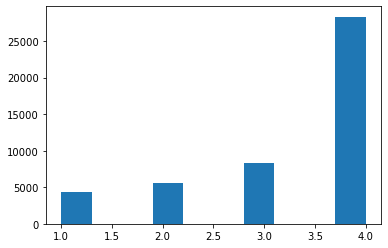

In [63]:
plt.hist(y)
pass

### correlation checking

In [15]:
df_new.corr()

,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,TempC_Max,RespRate_Mean,Glucose_Mean,ICU_LOS,Weight,Hosp_LOS,age,target,EDstay
HeartRate_Mean,1.000000,-0.102403,0.193277,0.292431,0.330383,-0.013083,0.270255,0.028596,0.159607,-0.714095,0.117685,-0.166919
SysBP_Mean,-0.102403,1.000000,0.523644,0.007407,-0.033791,0.004327,-0.029253,0.036976,-0.006471,0.006108,0.068520,0.076919
DiasBP_Mean,0.193277,0.523644,1.000000,-0.008006,0.025196,-0.006486,-0.031412,0.104151,-0.027211,-0.340395,0.167276,0.046495
TempC_Max,0.292431,0.007407,-0.008006,1.000000,0.129026,-0.004571,0.148418,0.057115,0.141159,-0.154620,0.015520,-0.023839
RespRate_Mean,0.330383,-0.033791,0.025196,0.129026,1.000000,0.004867,0.104334,0.033530,0.087151,0.034914,-0.187868,0.077048
Glucose_Mean,-0.013083,0.004327,-0.006486,-0.004571,0.004867,1.000000,0.010984,0.092937,0.004901,0.017045,-0.010797,0.003389
ICU_LOS,0.270255,-0.029253,-0.031412,0.148418,0.104334,0.010984,1.000000,0.041429,0.788420,-0.176285,-0.045976,-0.061927
Weight,0.028596,0.036976,0.104151,0.057115,0.033530,0.092937,0.041429,1.000000,0.032294,-0.182386,0.104950,-0.050110
Hosp_LOS,0.159607,-0.006471,-0.027211,0.141159,0.087151,0.004901,0.788420,0.032294,1.000000,-0.047144,-0.079687,-0.018086
age,-0.714095,0.006108,-0.340395,-0.154620,0.034914,0.017045,-0.176285,-0.182386,-0.047144,1.000000,-0.379781,0.199453


## Further data cleaning and transformation, continued

In [16]:
df_new

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,ETHNICITY,DIAGNOSIS,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,TempC_Max,RespRate_Mean,Glucose_Mean,ICU_LOS,Weight,GENDER,Hosp_LOS,age,target,EDstay
0,NEWBORN,PHYS REFERRAL/NORMAL DELI,Private,NOT SPECIFIED,ASIAN,NEWBORN,140.000000,NaN,NaN,NaN,NaN,NaN,0.0918,NaN,M,333840.0,0,4,0.0
1,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,CATHOLIC,WHITE,HYPOTENSION,111.785714,102.960000,55.720000,37.599998,17.361111,232.416667,6.0646,96.8,M,931800.0,76,2,8100.0
2,EMERGENCY,EMERGENCY ROOM ADMIT,Private,PROTESTANT QUAKER,WHITE,"FEVER,DEHYDRATION,FAILURE TO THRIVE",89.217391,118.000000,69.000000,37.444445,25.352941,199.666667,1.6785,53.6,F,670380.0,48,4,43200.0
3,NEWBORN,PHYS REFERRAL/NORMAL DELI,Private,BUDDHIST,ASIAN,NEWBORN,NaN,NaN,NaN,NaN,NaN,NaN,0.0844,NaN,M,200640.0,0,4,0.0
4,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,WHITE,CHRONIC RENAL FAILURE/SDA,84.160000,153.647059,56.558824,37.333332,12.320000,148.500000,3.6729,NaN,F,1413900.0,66,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,EMERGENCY,EMERGENCY ROOM ADMIT,Private,JEWISH,WHITE,FEVER,88.846154,114.600000,59.840000,38.611111,21.312500,106.500000,11.2998,NaN,M,1433880.0,54,4,16980.0
46516,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Private,NOT SPECIFIED,WHITE,DIVERTICULITIS/SDA,104.333333,166.306122,82.428571,37.611111,26.266667,139.500000,3.1426,100.5,M,1050300.0,47,4,0.0
46517,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,CATHOLIC,WHITE,RETROPERITONEAL HEMORRHAGE,68.521739,124.318182,51.818182,36.888889,15.695652,118.000000,1.9745,65.4,F,258780.0,66,2,18600.0
46518,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,WHITE,ABDOMINAL AORTIC ANEURYSM/SDA,69.935484,134.433333,50.333333,37.611111,20.228571,122.285714,2.1615,68.0,F,278100.0,89,4,0.0


Useful Variables: 
- 'ADMISSION_TYPE': 4 types - 
        'NEWBORN', 'EMERGENCY', 'ELECTIVE', 'URGENT'
- 'ADMISSION_LOCATION': 9-1 types - 
        'PHYS REFERRAL/NORMAL DELI', 'EMERGENCY ROOM ADMIT',
       'TRANSFER FROM HOSP/EXTRAM', 'CLINIC REFERRAL/PREMATURE',
       'TRANSFER FROM SKILLED NUR', 'HMO REFERRAL/SICK',
       'TRANSFER FROM OTHER HEALT', 'TRSF WITHIN THIS FACILITY'
- 'INSURANCE': 5 types - 
        'Private', 'Medicare', 'Medicaid', 'Government', 'Self Pay'
- 'RELIGION': 5 types, only category out the popular ones with Dietary Restrictions -
        'BUDDHIST', 'JEWISH', 'HINDU', 'MUSLIM', '7TH DAY ADVENTIST'
- 'ETHNICITY': category into 4 main types -
        'ASIAN', 'WHITE', 'BLACK', 'ETHNICITY_Others'
- 'DIAGNOSIS': 12607 different types, attempt to use top 10 (the 10th - 456/46520 = 0.98%) -
        NEWBORN                                                      7821
        PNEUMONIA                                                     936
        CORONARY ARTERY DISEASE                                       791
        SEPSIS                                                        698
        INTRACRANIAL HEMORRHAGE                                       665
        CHEST PAIN                                                    600
        CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     547
        GASTROINTESTINAL BLEED                                        513
        CONGESTIVE HEART FAILURE                                      504
        ALTERED MENTAL STATUS                                         456
    **as info for NEWBORN is contained in ADMISSION_TYPE, ignore this one**, so use 9 types -
        'PNEUMONIA', 'CORONARY ARTERY DISEASE', 'SEPSIS', 'INTRACRANIAL HEMORRHAGE',
        'CHEST PAIN', 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA', 
        'GASTROINTESTINAL BLEED', 'CONGESTIVE HEART FAILURE', 'ALTERED MENTAL STATUS'
- 'GENDER': 2 types -
        'M', 'F'
- 'ICU_LOS': fill na with 0
- 'Hosp_LOS', 'age', 'EDstay': numerical and no missing

- 'HeartRate_Mean', 'SysBP_Mean', 'DiasBP_Mean', 'TempC_Max', 'RespRate_Mean', 'Glucose_Mean', 'Weight': **needs further imputation**

Dependent Variable: 'target'

In [17]:
df_new = pd.concat([df_new, pd.get_dummies(df_new['ADMISSION_TYPE'])], axis=1).drop(
    'ADMISSION_TYPE', axis=1)

In [18]:
df_new = pd.concat([df_new, pd.get_dummies(df_new['ADMISSION_LOCATION'])], axis=1).drop(
    ['ADMISSION_LOCATION', '** INFO NOT AVAILABLE **'], axis=1)

In [19]:
df_new = pd.concat([df_new, pd.get_dummies(df_new['INSURANCE'])], axis=1).drop(
    'INSURANCE', axis=1)

In [20]:
df_new = pd.concat([df_new, pd.get_dummies(df_new['RELIGION'])], axis=1).drop(
    ['RELIGION', 'NOT SPECIFIED', 'CATHOLIC', 'PROTESTANT QUAKER',
       'UNOBTAINABLE', 'OTHER', "JEHOVAH'S WITNESS",
       'GREEK ORTHODOX', 'EPISCOPALIAN', 'CHRISTIAN SCIENTIST',
       'METHODIST', 'UNITARIAN-UNIVERSALIST', 'HEBREW',
        'BAPTIST', 'ROMANIAN EAST. ORTH',
       'LUTHERAN'], axis=1)

In [21]:
result = [] 
for value in df_new['ETHNICITY']: 
    if 'ASIAN' in value: 
        result.append('ASIAN') 
    elif 'WHITE' in value: 
        result.append('WHITE')
    elif 'BLACK' in value: 
        result.append('BLACK')
    else: 
        result.append('ETHNICITY_Others') 
        
df_new['ETHNICITY'] = result
df_new = pd.concat([df_new, pd.get_dummies(df_new['ETHNICITY'])], axis=1).drop(
    'ETHNICITY', axis=1)

In [22]:
result = [] 
for value in df_new['DIAGNOSIS']: 
    if value == 'PNEUMONIA': 
        result.append('PNEUMONIA')
    elif value == 'CORONARY ARTERY DISEASE': 
        result.append('CORONARY ARTERY DISEASE')
    elif value == 'SEPSIS': 
        result.append('SEPSIS')
    elif value == 'INTRACRANIAL HEMORRHAGE': 
        result.append('INTRACRANIAL HEMORRHAGE')
    elif value == 'CHEST PAIN': 
        result.append('CHEST PAIN')
    elif value == 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA': 
        result.append('CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA')
    elif value == 'GASTROINTESTINAL BLEED': 
        result.append('GASTROINTESTINAL BLEED')
    elif value == 'CONGESTIVE HEART FAILURE': 
        result.append('CONGESTIVE HEART FAILURE')
    elif value == 'ALTERED MENTAL STATUS': 
        result.append('ALTERED MENTAL STATUS')
    else: 
        result.append('others') 
        
df_new['DIAGNOSIS'] = result
df_new = pd.concat([df_new, pd.get_dummies(df_new['DIAGNOSIS'])], axis=1).drop(
    ['DIAGNOSIS', 'others'], axis=1)

In [23]:
df_new = pd.concat([df_new, pd.get_dummies(df_new['GENDER'])], axis=1).drop(
    'GENDER', axis=1)

In [24]:
df_new['ICU_LOS'] = df_new['ICU_LOS'].fillna(0)

## train-test-split and imputation

'HeartRate_Mean', 'SysBP_Mean', 'DiasBP_Mean', 'TempC_Max', 'RespRate_Mean', 'Glucose_Mean', 'Weight': needs further imputation

In [25]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_new.loc[:, df_new.columns != 'target']
y = df_new['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

missing data imputation on training

ref: https://scikit-learn.org/stable/modules/impute.html

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

Univariate feature imputation, seems the best

In [48]:
imp = SimpleImputer(strategy='mean')
imp.fit(X_train)
X_train1 = imp.transform(X_train)
X_test1 = imp.transform(X_test)

Multivariate feature imputation, doesn't perform well on testing

In [51]:
# imp = IterativeImputer(max_iter=10, random_state=0)
# imp.fit(X_train)
# X_train2 = imp.transform(X_train)
# X_test2 = imp.transform(X_test)

Nearest neighbors imputation, potential to overfit

In [57]:
imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(X_train)
X_train3 = imp.transform(X_train)
X_test3 = imp.transform(X_test)

In [94]:
# # Nearest neighbors imputation with n=5, perform worse than n=2
# imp = KNNImputer(n_neighbors=5, weights="uniform")
# imp.fit(X_train)
# X_train4 = imp.transform(X_train)
# X_test4 = imp.transform(X_test)

## logistic regression
ovr strategy

In [64]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier

In [87]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train1, y_train)
train_pred_dummy = dummy_clf.predict(X_train1)
test_pred_dummy = dummy_clf.predict(X_test1)

L1 regularization with feature selection (L2 doesn't perform well)

In [88]:
clf = OneVsRestClassifier(LogisticRegression(
    penalty='l1', solver='liblinear', multi_class='ovr', random_state=0))

clf.fit(X_train1, y_train)
train_pred = clf.predict(X_train1)
test_pred = clf.predict(X_test1)

measurement

In [90]:
print('Imputation 1:')
print('Training')
print('Accuracy: Dummy {}, LogReg {}'.format(
    accuracy_score(y_train, train_pred_dummy), accuracy_score(y_train, train_pred)))
print('F1: Dummy {}, LogReg {}'.format(
    f1_score(y_train, train_pred_dummy, average='weighted'), 
    f1_score(y_train, train_pred, average='weighted')))
print('Testing')
print('Accuracy: Dummy {}, LogReg {}'.format(
    accuracy_score(y_test, test_pred_dummy), accuracy_score(y_test, test_pred)))
print('F1: Dummy {}, LogReg {}'.format(
    f1_score(y_test, test_pred_dummy, average='weighted'), 
    f1_score(y_test, test_pred, average='weighted')))

Imputation 1:
Training
Accuracy: Dummy 0.6094421754084265, LogReg 0.648054600171969
F1: Dummy 0.46155092844177575, LogReg 0.5874470602860422
Testing
Accuracy: Dummy 0.6072656921754084, LogReg 0.6472484952708513
F1: Dummy 0.45888072232059074, LogReg 0.5879703396793402


In [96]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train3, y_train)
train_pred_dummy = dummy_clf.predict(X_train3)
test_pred_dummy = dummy_clf.predict(X_test3)

clf = OneVsRestClassifier(LogisticRegression(
    penalty='l1', solver='liblinear', multi_class='ovr', random_state=0))

clf.fit(X_train3, y_train)
train_pred = clf.predict(X_train3)
test_pred = clf.predict(X_test3)

print('Imputation 3:')
print('Training')
print('Accuracy: Dummy {}, LogReg {}'.format(
    accuracy_score(y_train, train_pred_dummy), accuracy_score(y_train, train_pred)))
print('F1: Dummy {}, LogReg {}'.format(
    f1_score(y_train, train_pred_dummy, average='weighted'), 
    f1_score(y_train, train_pred, average='weighted')))
print('Testing')
print('Accuracy: Dummy {}, LogReg {}'.format(
    accuracy_score(y_test, test_pred_dummy), accuracy_score(y_test, test_pred)))
print('F1: Dummy {}, LogReg {}'.format(
    f1_score(y_test, test_pred_dummy, average='weighted'), 
    f1_score(y_test, test_pred, average='weighted')))

Imputation 3:
Training
Accuracy: Dummy 0.6094421754084265, LogReg 0.6488607050730868
F1: Dummy 0.46155092844177575, LogReg 0.5882567710869769
Testing
Accuracy: Dummy 0.6072656921754084, LogReg 0.6476784178847808
F1: Dummy 0.45888072232059074, LogReg 0.5879364906246733
